In [2]:
import os
from selenium import webdriver
from bs4 import BeautifulSoup 
from webdriver_manager.chrome import ChromeDriverManager
from splinter import Browser
import os
import time

In [3]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [C:\Users\kliu3\.wdm\drivers\chromedriver\win32\89.0.4389.23\chromedriver.exe] found in cache


In [4]:
# URL of page to be scraped
listings={}
url='https://mars.nasa.gov/news/'
browser.visit(url)
time.sleep(2)

In [5]:
# Create BeautifulSoup object; parse with 'html.parser'
html=browser.html
soup = BeautifulSoup(html, 'html.parser')

<html class="no-flash cookies geolocation svg picture canvas video webgl srcdoc supports no-hiddenscroll no-touchevents fullscreen flexbox cssanimations flexboxlegacy no-flexboxtweener csstransforms csstransforms3d csstransitions preserve3d -webkit-" lang="en" style="--vh:674px;" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <script src="https://api-public.addthis.com/url/shares.json?url=http%3A%2F%2Fmars.nasa.gov%2Fnews%2F&amp;callback=_ate.cbs.rcb_9bqv0" type="text/javascript">
  </script>
  <script src="//www.reddit.com/api/info.json?url=http%3A%2F%2Fmars.nasa.gov%2Fnews%2F&amp;jsonp=_ate.cbs.rcb_gaaf0" type="text/javascript">
  </script>
  <script src="https://api-public.addthis.com/url/shares.json?url=https%3A%2F%2Fmars.nasa.gov%2Fnews%2F&amp;callback=_ate.cbs.rcb_1iev0" type="text/javascript">
  </script>
  <script src="//www.reddit.com/api/info.json?url=https%3A%2F%2Fmars.nasa.gov%2Fnews%2F&amp;jsonp=_ate.cbs.rcb_iz9l0" type="text/javascript">
  </script>
  <scri
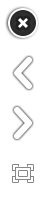
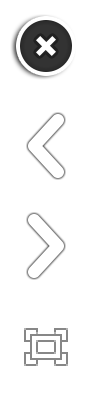
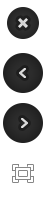
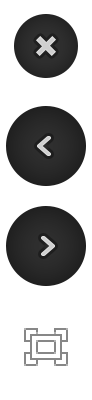
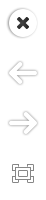
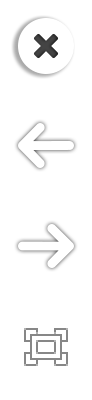
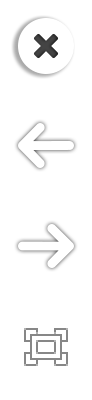
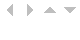

In [6]:
# Examine the results, then determine element that contains sought info
print(soup.prettify())


In [7]:
# results are returned as an iterable list
results=soup.find('li', class_='slide')

In [8]:
news_title=results.find('div',class_='content_title').text
news_p=results.find('div',class_='article_teaser_body').text

print(news_title)
print(news_p)

NASA Ingenuity Mars Helicopter Prepares for First Flight
Now uncocooned from its protective carbon-fiber shield, the helicopter is being readied for its next steps.  


In [9]:
#JPL Mars Space Images - Featured Image

In [10]:

url='https://data-class-jpl-space.s3.amazonaws.com/JPL_Space/index.html'
browser.visit(url)
time.sleep(2)


In [11]:
html=browser.html
soup = BeautifulSoup(html, 'html.parser')

image=soup.find('img',class_='headerimage fade-in')
print(image['src'])

image/featured/mars1.jpg


In [12]:
featured_image_url = 'https://data-class-jpl-space.s3.amazonaws.com/JPL_Space/' + image['src']

In [13]:
print(featured_image_url)

https://data-class-jpl-space.s3.amazonaws.com/JPL_Space/image/featured/mars1.jpg


In [14]:
# Mars Facts

In [15]:
import pandas as pd

In [16]:
url='https://space-facts.com/mars/'

In [31]:
tables=pd.read_html(url)
tables

[                      0                              1
 0  Equatorial Diameter:                       6,792 km
 1       Polar Diameter:                       6,752 km
 2                 Mass:  6.39 × 10^23 kg (0.11 Earths)
 3                Moons:            2 (Phobos & Deimos)
 4       Orbit Distance:       227,943,824 km (1.38 AU)
 5         Orbit Period:           687 days (1.9 years)
 6  Surface Temperature:                   -87 to -5 °C
 7         First Record:              2nd millennium BC
 8          Recorded By:           Egyptian astronomers,
   Mars - Earth Comparison             Mars            Earth
 0               Diameter:         6,779 km        12,742 km
 1                   Mass:  6.39 × 10^23 kg  5.97 × 10^24 kg
 2                  Moons:                2                1
 3      Distance from Sun:   227,943,824 km   149,598,262 km
 4         Length of Year:   687 Earth days      365.24 days
 5            Temperature:     -87 to -5 °C      -88 to 58°C,
           

In [32]:
df=tables[0]
df.head()

,0,1
0,Equatorial Diameter:,"6,792 km"
1,Polar Diameter:,"6,752 km"
2,Mass:,6.39 × 10^23 kg (0.11 Earths)
3,Moons:,2 (Phobos & Deimos)
4,Orbit Distance:,"227,943,824 km (1.38 AU)"


In [33]:

df = df.rename(columns={0: "Description", 1: "Mars"})
df.head()

,Description,Mars
0,Equatorial Diameter:,"6,792 km"
1,Polar Diameter:,"6,752 km"
2,Mass:,6.39 × 10^23 kg (0.11 Earths)
3,Moons:,2 (Phobos & Deimos)
4,Orbit Distance:,"227,943,824 km (1.38 AU)"


In [34]:
df = df.set_index("Description")
df.head()


,Mars
Description,
Equatorial Diameter:,"6,792 km"
Polar Diameter:,"6,752 km"
Mass:,6.39 × 10^23 kg (0.11 Earths)
Moons:,2 (Phobos & Deimos)
Orbit Distance:,"227,943,824 km (1.38 AU)"


In [35]:
html_table = df.to_html()
html_table

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Mars</th>\n    </tr>\n    <tr>\n      <th>Description</th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Equatorial Diameter:</th>\n      <td>6,792 km</td>\n    </tr>\n    <tr>\n      <th>Polar Diameter:</th>\n      <td>6,752 km</td>\n    </tr>\n    <tr>\n      <th>Mass:</th>\n      <td>6.39 × 10^23 kg (0.11 Earths)</td>\n    </tr>\n    <tr>\n      <th>Moons:</th>\n      <td>2 (Phobos &amp; Deimos)</td>\n    </tr>\n    <tr>\n      <th>Orbit Distance:</th>\n      <td>227,943,824 km (1.38 AU)</td>\n    </tr>\n    <tr>\n      <th>Orbit Period:</th>\n      <td>687 days (1.9 years)</td>\n    </tr>\n    <tr>\n      <th>Surface Temperature:</th>\n      <td>-87 to -5 °C</td>\n    </tr>\n    <tr>\n      <th>First Record:</th>\n      <td>2nd millennium BC</td>\n    </tr>\n    <tr>\n      <th>Recorded By:</th>\n      <td>Egyptian astronomers</td>\n    </tr>\n

In [19]:
# Mars Hemispheres

In [20]:
url='https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars'
browser.visit(url)
time.sleep(2)

In [21]:
html=browser.html
soup = BeautifulSoup(html, 'html.parser')

In [22]:
main_page_items = soup.find_all('div',class_='item')

In [23]:

hemisphere_image_urls  = []
for item in main_page_items:
    title = item.find('h3').text
    link = 'https://astrogeology.usgs.gov/' + item.find('a', class_='itemLink product-item')["href"]
    
    browser.visit(link)
    time.sleep(2)
    linked_page = BeautifulSoup(browser.html, 'html.parser')
    full_link = linked_page.find('div', class_='downloads').find('a')["href"]
    
    hemisphere_image_urls.append({"title": title, "img_url": full_link})

In [24]:
hemisphere_image_urls 

[{'title': 'Cerberus Hemisphere Enhanced',
  'img_url': 'https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/cerberus_enhanced.tif/full.jpg'},
 {'title': 'Schiaparelli Hemisphere Enhanced',
  'img_url': 'https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/schiaparelli_enhanced.tif/full.jpg'},
 {'title': 'Syrtis Major Hemisphere Enhanced',
  'img_url': 'https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/syrtis_major_enhanced.tif/full.jpg'},
 {'title': 'Valles Marineris Hemisphere Enhanced',
  'img_url': 'https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/valles_marineris_enhanced.tif/full.jpg'}]

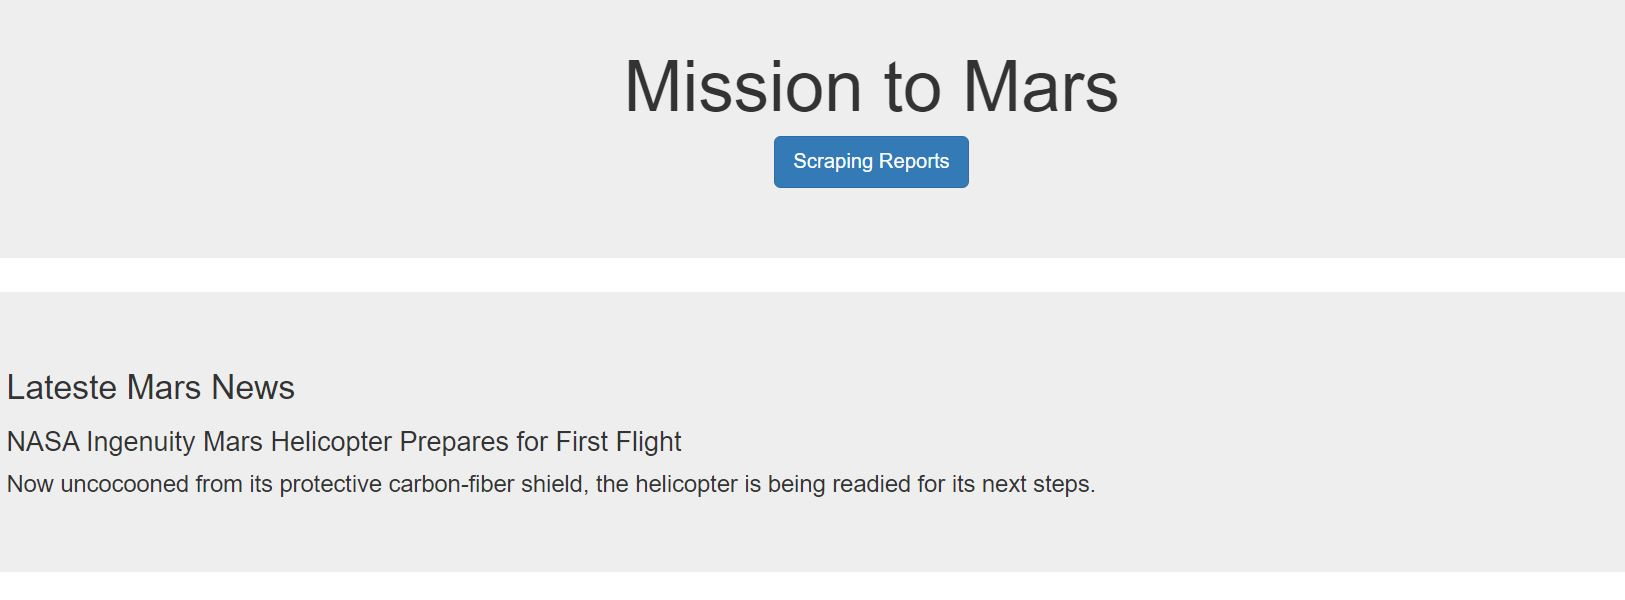

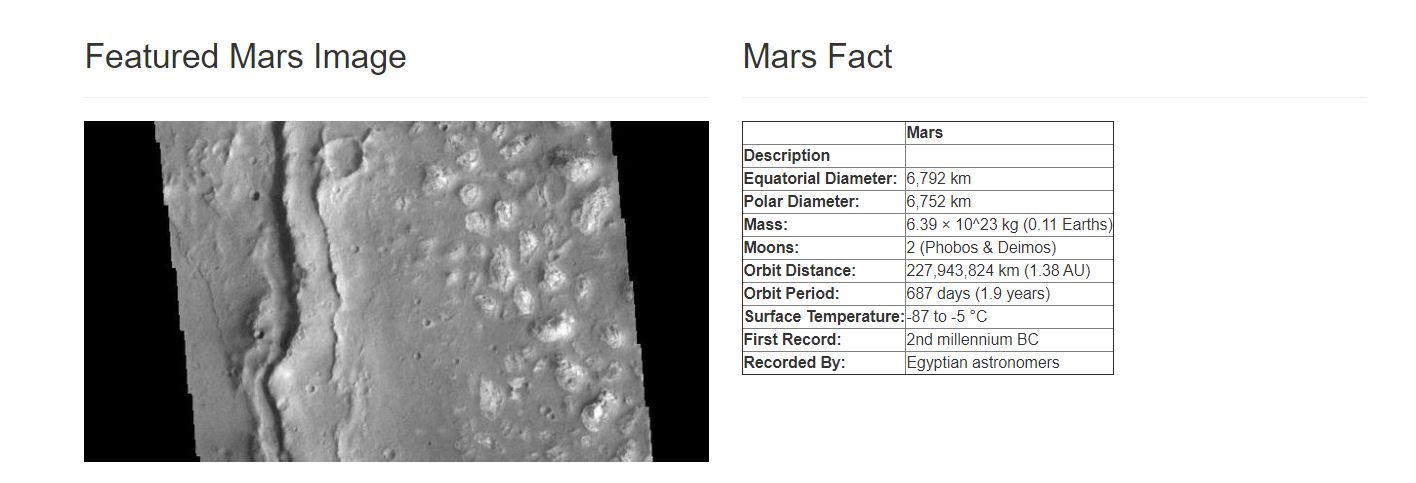

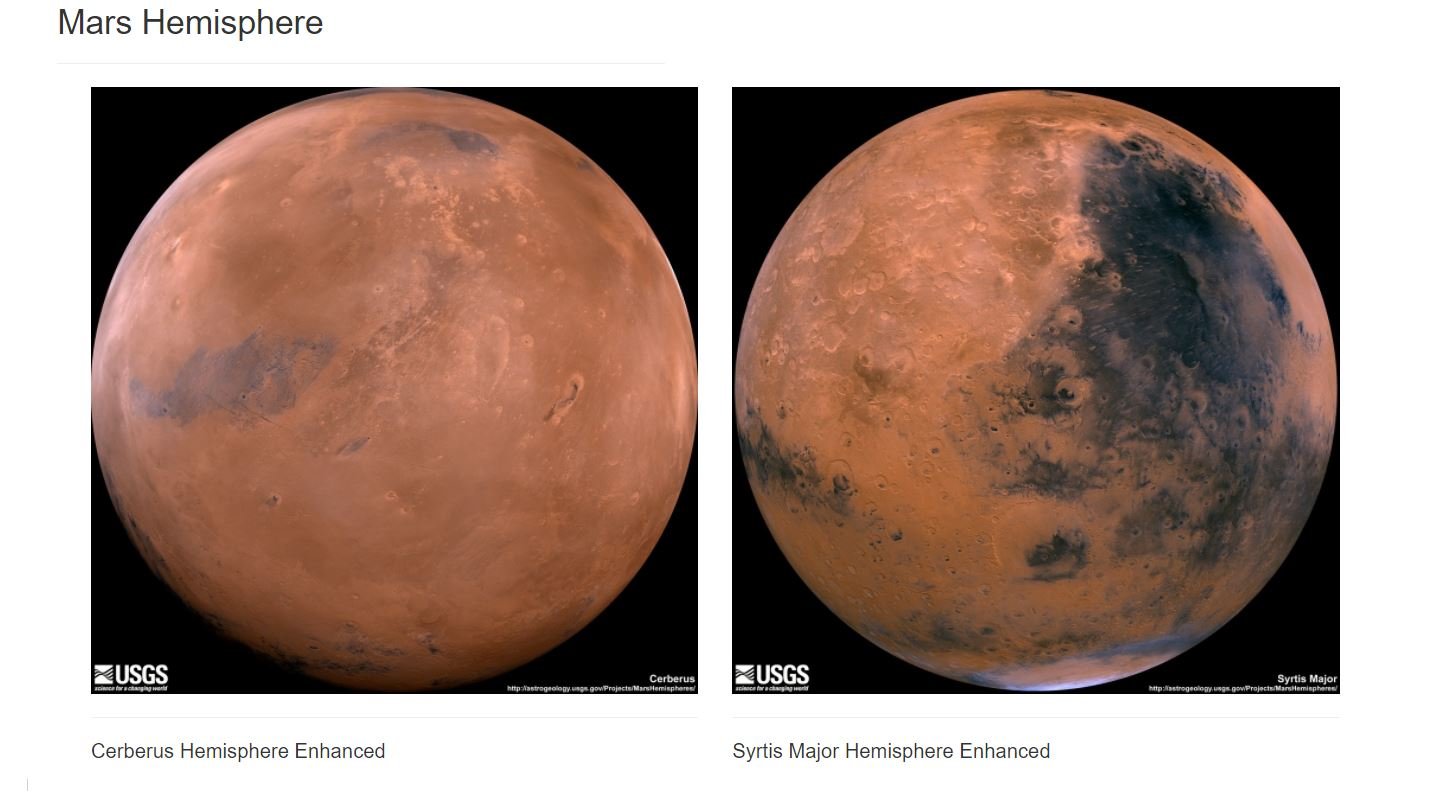

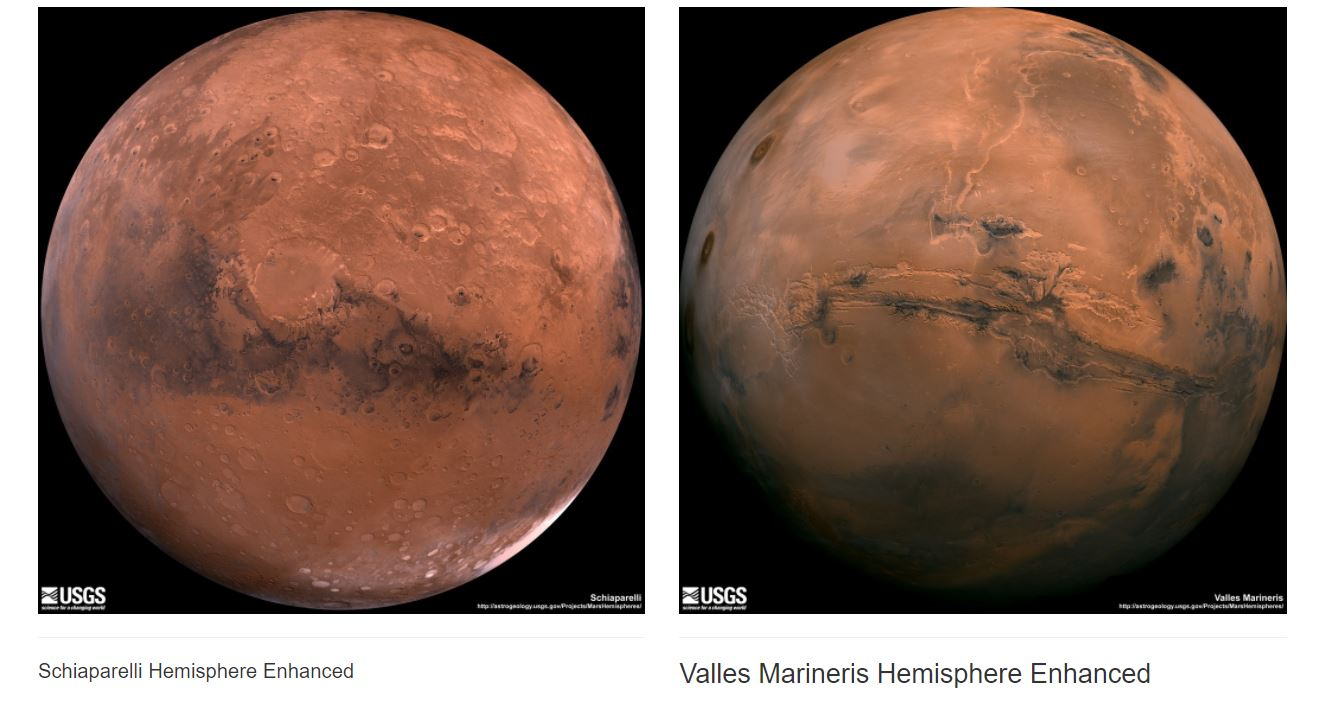